#### IMPORT REQUIRED FUNCTIONALITY 

In [37]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, BaseDecisionTree, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
from dmba import plotDecisionTree, regressionSummary, classificationSummary

In [40]:
%matplotlib inline

In [19]:
data = pd.read_csv("RidingMowers.csv")

In [20]:
data.head()

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner


In [21]:
!pip install graphviz pydotplus

In [22]:
import os
# Add Graphviz to PATH
os.environ["PATH"] += os.pathsep + "/opt/homebrew/bin"

# Verify it worked
!which dot

/opt/homebrew/bin/dot


In [23]:
classTrees = DecisionTreeClassifier(max_depth = 1, random_state = 0)

classTrees.fit(data.drop(columns = ['Ownership']), data['Ownership'])
print("Classes : {}".format(', '.join(classTrees.classes_)))

Classes : Nonowner, Owner


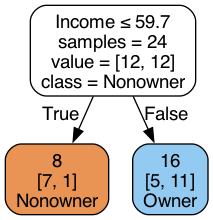

In [24]:
plotDecisionTree(classTrees, feature_names = data.columns[:2],class_names = classTrees.classes_)

In [25]:
fullTree = DecisionTreeClassifier(random_state = 0)

fullTree.fit(data.drop(columns = ['Ownership']), data['Ownership'])

DecisionTreeClassifier(random_state=0)

In [26]:
print("Classes : {}".format(', '.join(fullTree.classes_)))

Classes : Nonowner, Owner


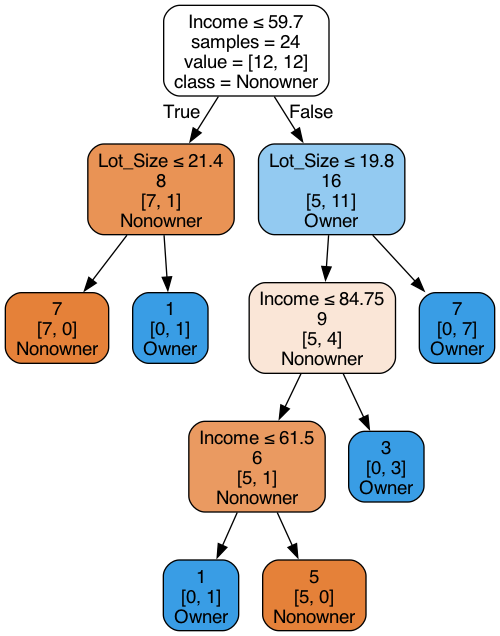

In [27]:
plotDecisionTree(fullTree, feature_names = data.columns[:-1], class_names = fullTree.classes_)

In [34]:
x = data.drop(columns=['Ownership'])

x['Income'] = x['Income'].astype("int64")
x['Lot_Size'] = x['Lot_Size'].astype("int64")

print(x.dtypes)

Income      int64
Lot_Size    int64
dtype: object


In [36]:
# Importance Scale
featureImportance = pd.DataFrame({
    'Features': x.columns,
    'Importance' : fullTree.feature_importances_
})
featureImportance = featureImportance.sort_values(by="Importance", ascending=False)

print(featureImportance)

   Features  Importance
0    Income     0.65162
1  Lot_Size     0.34838


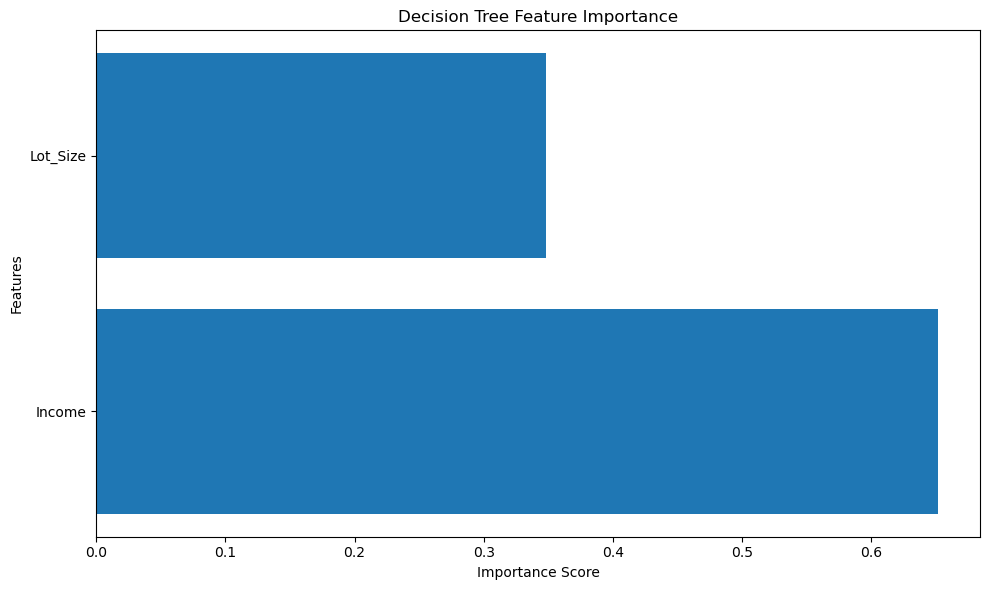

In [45]:
plt.figure(figsize=(10, 6))
plt.barh(featureImportance["Features"], featureImportance["Importance"])
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Decision Tree Feature Importance')
plt.tight_layout()
plt.show();

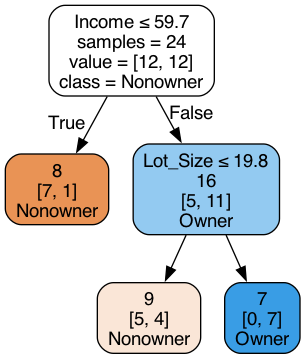

In [13]:
# Create a decision tree with moderate constraints
balancedTree = DecisionTreeClassifier(
    max_depth=3,               # Limit depth to 3 levels
    min_samples_split=10,      # Require at least 10 samples to consider splitting
    min_samples_leaf=5,        # Require at least 5 samples in each leaf node
    random_state=0
)

#balancedTree.fit(X,Y)
balancedTree.fit(data.drop(columns=['Ownership']), data['Ownership'])
plotDecisionTree(balancedTree, feature_names=data.columns[:-1], class_names=balancedTree.classes_)

Data shape: (5000, 14)
Columns: ['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard']
Training set: 3000 records
Validation set: 2000 records
Classes : 0, 1

Full Decision Tree:


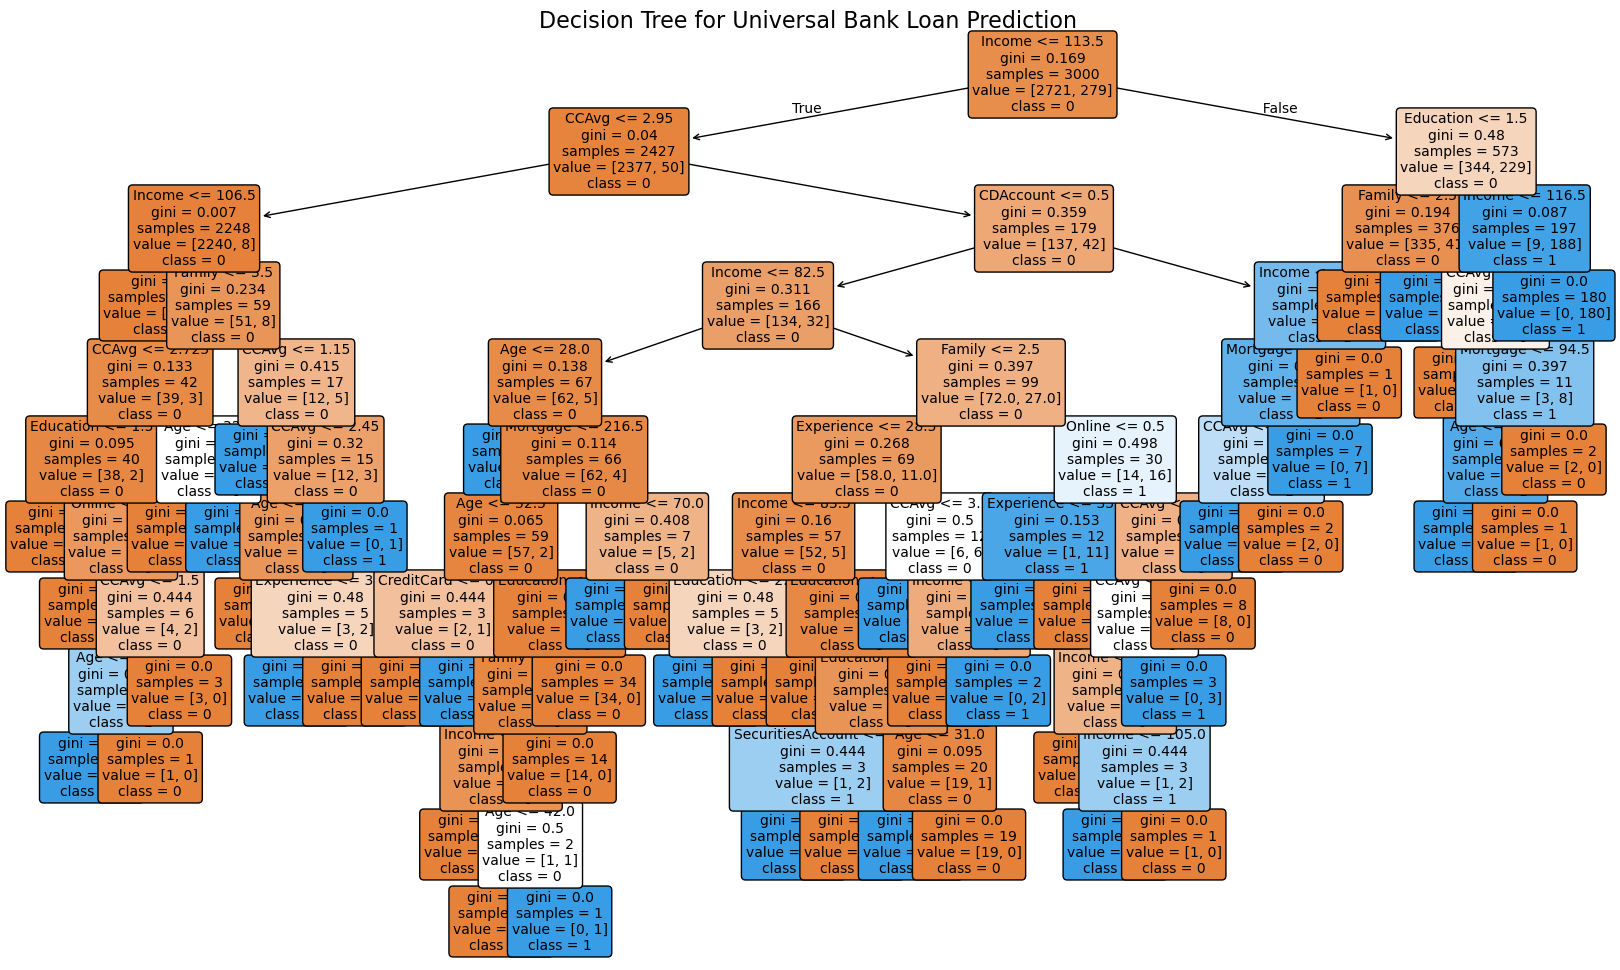


Confusion Matrix:
[[1777   22]
 [  17  184]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1799
           1       0.89      0.92      0.90       201

    accuracy                           0.98      2000
   macro avg       0.94      0.95      0.95      2000
weighted avg       0.98      0.98      0.98      2000


Feature Importance:
              Feature  Importance
5           Education    0.375445
2              Income    0.314119
3              Family    0.158592
4               CCAvg    0.073726
0                 Age    0.020440
8           CDAccount    0.015832
1          Experience    0.015023
9              Online    0.013032
6            Mortgage    0.008522
7   SecuritiesAccount    0.002634
10         CreditCard    0.002634

Pruned Decision Tree (max_depth=4):


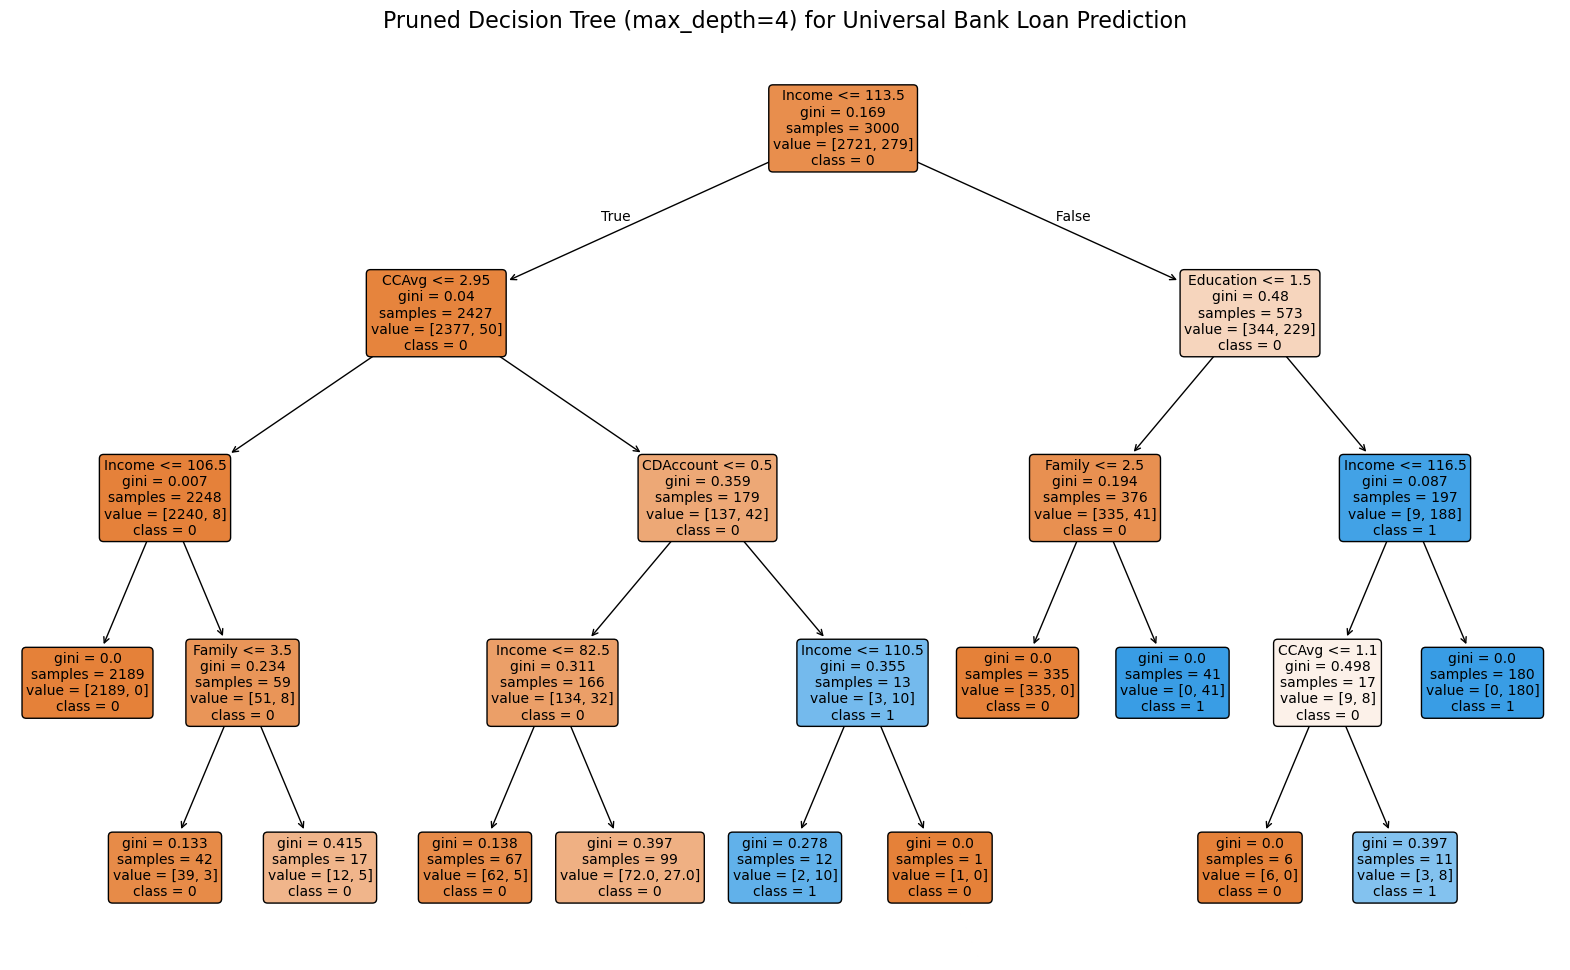


More Readable Decision Tree (max_depth=3):


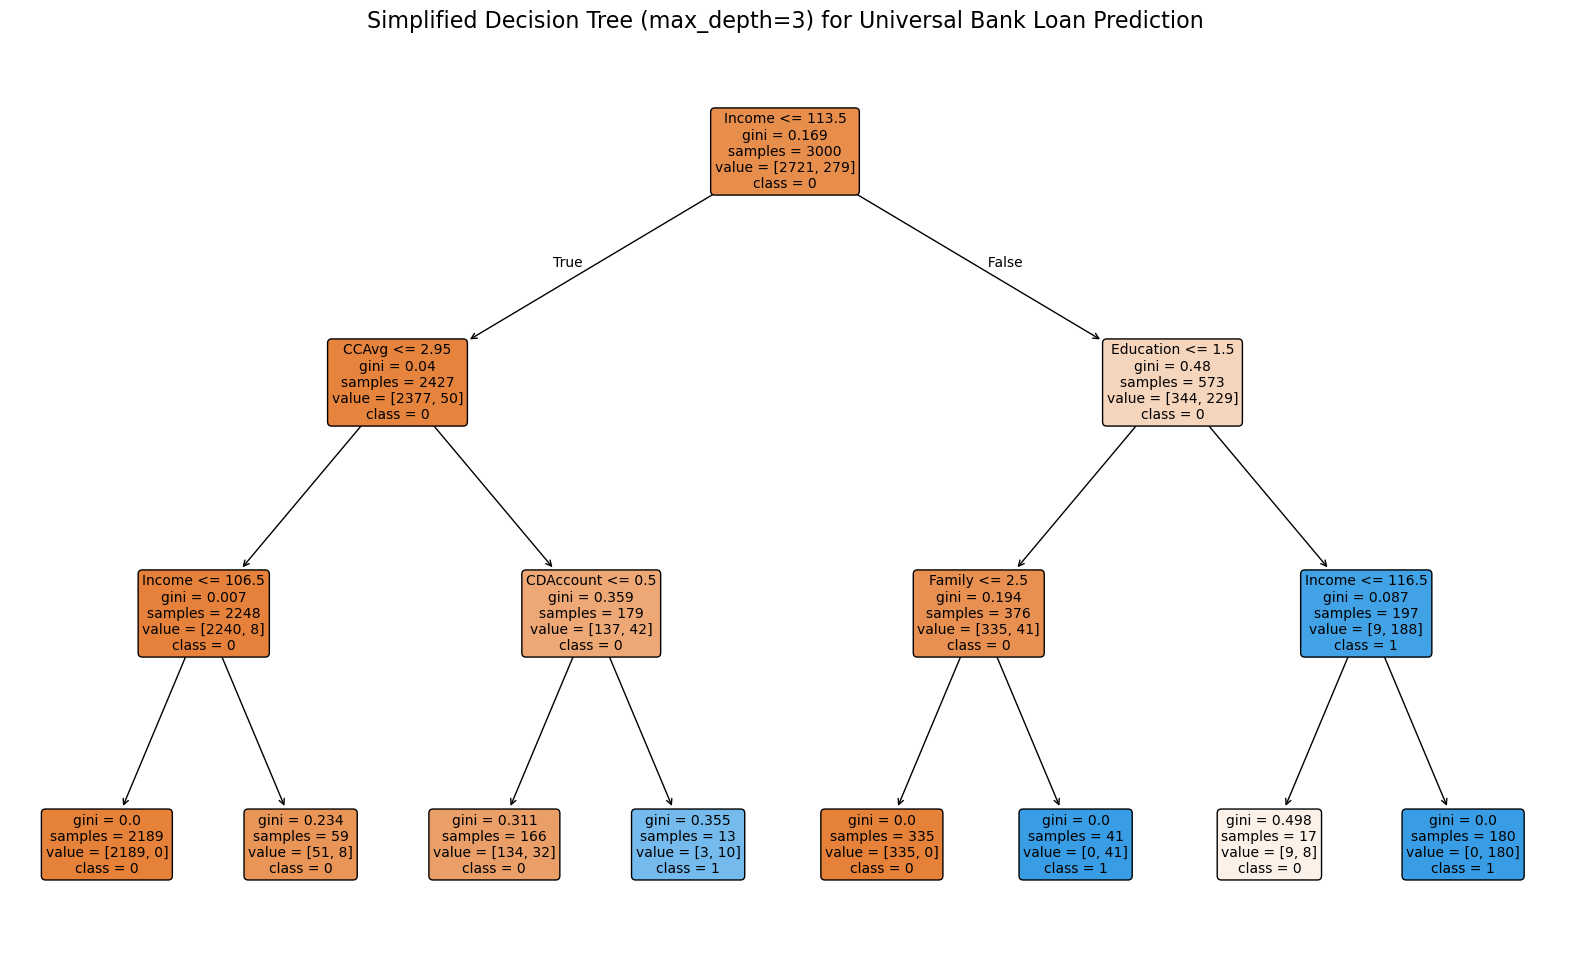

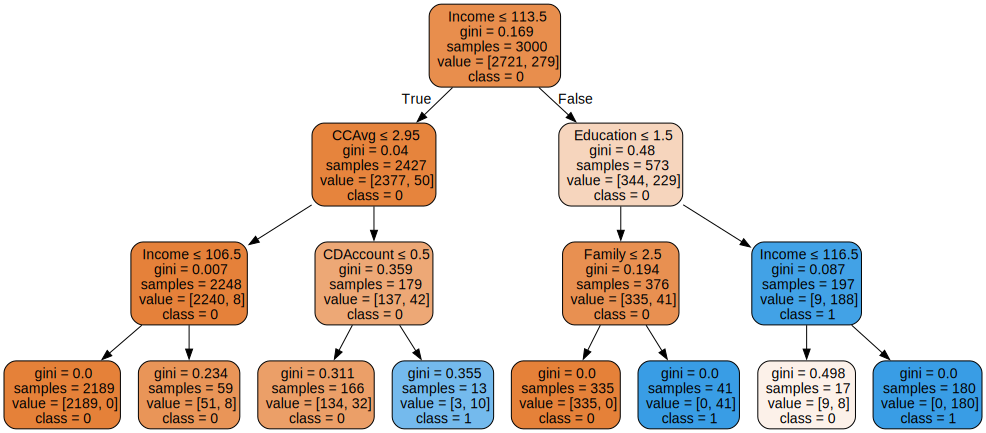

In [47]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
import io
from IPython.display import Image, display

# Load the data
data = pd.read_csv('UniversalBank.csv')

# Check the data
print("Data shape:", data.shape)
print("Columns:", data.columns.tolist())

# Define features and target
# Assuming 'PersonalLoan' is the target variable to predict
X = data.drop(columns=['ID', 'ZIP Code', 'PersonalLoan'])
y = data['PersonalLoan']

# Split data - 3000 records for training, 2000 for validation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=3000, test_size=2000, random_state=42)

print(f"Training set: {X_train.shape[0]} records")
print(f"Validation set: {X_test.shape[0]} records")

# Build the full decision tree
fullTree = DecisionTreeClassifier(random_state=0)
fullTree.fit(X_train, y_train)

# Print classes
print("Classes : {}".format(', '.join(map(str, fullTree.classes_))))

# Function to plot the decision tree and display in Jupyter notebook
def plotDecisionTree(model, feature_names, class_names, title="Decision Tree"):
    # Create a figure with high DPI for better quality
    plt.figure(figsize=(20, 12), dpi=100)
    tree.plot_tree(model, 
                   feature_names=feature_names,
                   class_names=class_names,
                   filled=True,
                   rounded=True,
                   fontsize=10)
    plt.title(title, fontsize=16)
    
    # Save it to a BytesIO object
    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight')
    plt.close()
    buf.seek(0)
    
    # Display the image in the notebook
    display(Image(data=buf.getvalue()))

# Plot the full decision tree
print("\nFull Decision Tree:")
plotDecisionTree(fullTree, feature_names=X.columns, 
                 class_names=list(map(str, fullTree.classes_)),
                 title="Decision Tree for Universal Bank Loan Prediction")

# Evaluate the model
y_pred = fullTree.predict(X_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': fullTree.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

# Create a pruned tree for better visualization
prunedTree = DecisionTreeClassifier(random_state=0, max_depth=4)
prunedTree.fit(X_train, y_train)

# Plot the pruned tree
print("\nPruned Decision Tree (max_depth=4):")
plotDecisionTree(prunedTree, feature_names=X.columns, 
                 class_names=list(map(str, prunedTree.classes_)),
                 title="Pruned Decision Tree (max_depth=4) for Universal Bank Loan Prediction")

# Plot a more readable tree with depth=3
readableTree = DecisionTreeClassifier(random_state=0, max_depth=3)
readableTree.fit(X_train, y_train)

print("\nMore Readable Decision Tree (max_depth=3):")
plotDecisionTree(readableTree, feature_names=X.columns, 
                 class_names=list(map(str, readableTree.classes_)),
                 title="Simplified Decision Tree (max_depth=3) for Universal Bank Loan Prediction")

# Export to graphviz for better visualization (optional)
try:
    import graphviz
    dot_data = tree.export_graphviz(
        readableTree, 
        out_file=None, 
        feature_names=X.columns,
        class_names=list(map(str, readableTree.classes_)),
        filled=True, 
        rounded=True,
        special_characters=True
    )
    graph = graphviz.Source(dot_data)
    display(graph)
except ImportError:
    print("Graphviz not installed. Skipping graphviz visualization.")

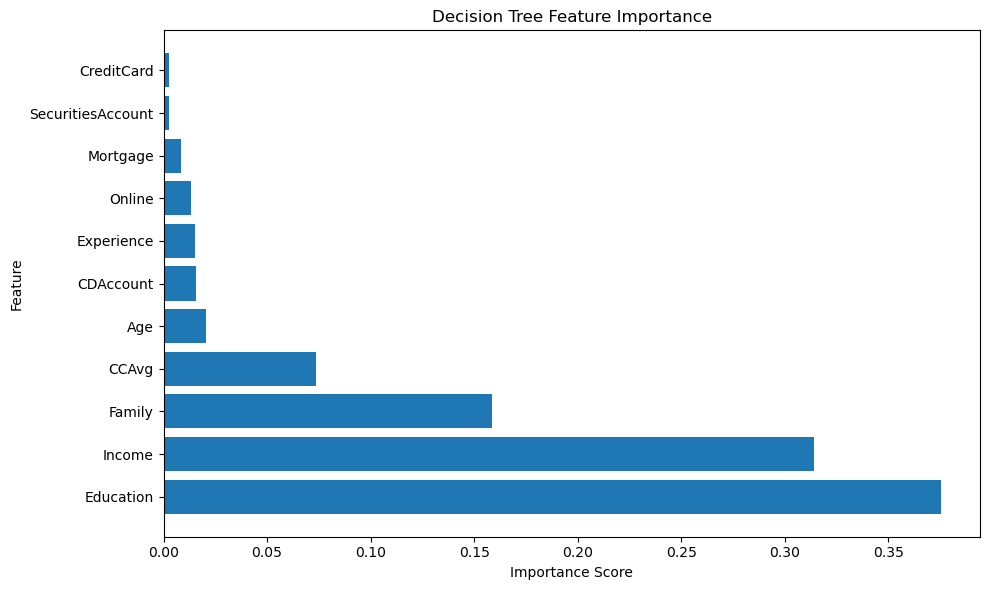

In [52]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance["Feature"], feature_importance["Importance"])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance')
plt.tight_layout()
plt.show();